<a href="https://colab.research.google.com/github/kevinnanda99/PYTORCH-WORKFLOW/blob/main/PYTORCH_NEURAL_NETWORKS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICATION DATA

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X1": X[:,1],
                         "label": y})


In [5]:
circles

,X1,label
0,0.231481,1
1,0.153259,1
2,0.173282,1
3,0.692883,1
4,-0.896723,0
...,...,...
995,0.944125,0
996,-0.272373,0
997,-0.810012,1
998,-0.767502,0


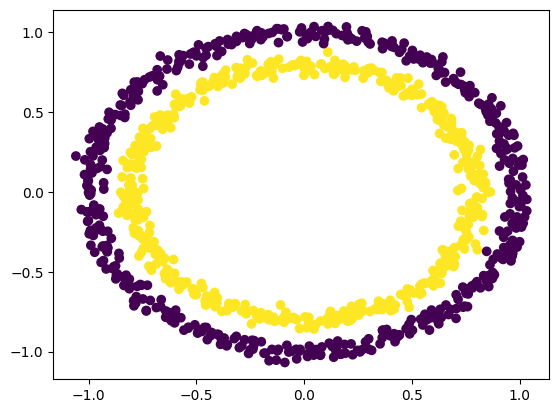

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

TURN DATA INTO TENSORS AND TEST TRAIN SPLIT

In [8]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [9]:
import torch

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [11]:
X[:5],  y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )


BUILDING A MODEL

In [14]:
import torch.nn as nn
class CircleModelV0(nn.Module):
    def __init__():
      super().__init__()
      self.layer_1 = nn.Linear(in_features = 2, out_features =5)
      self.layer_1 = nn.Linear(in_features = 5, out_features = 1)


    def forward(self ,x):
      return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0
model_0


__main__.CircleModelV0

REPLICATING ABOUT MODEL USING NN SEQUENTIAL

In [15]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
with torch.inference_mode():
  untrained_preds = model_0(X_test[:10])
untrained_preds, untrained_preds.shape, X_test.shape, y_test.shape

(tensor([[ 0.0071],
         [ 0.0063],
         [ 0.0210],
         [-0.0121],
         [-0.0936],
         [ 0.0145],
         [-0.1110],
         [-0.0382],
         [ 0.0248],
         [-0.0503]]),
 torch.Size([10, 1]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [17]:
  X_test[:5]

tensor([[-0.7562,  0.1533],
        [-0.1633, -0.8008],
        [-0.7182, -0.2547],
        [-0.6191,  0.4022],
        [ 0.9733, -0.1878]])

LOSS FUNCTION

In [18]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [43]:
#calculate accuracy


def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


TURNING LOGITS IN PREDICTION PROBABALITIES THEN INTO PREDICTION LABELS USING ACTIVATION AND ROUND FUNCTION

In [31]:
with torch.inference_mode():
  y_logits = model_0(X_test[:-5])

y_logits

tensor([[ 0.0098],
        [ 0.0084],
        [ 0.0233],
        [-0.0090],
        [-0.0904],
        [ 0.0166],
        [-0.1074],
        [-0.0347],
        [ 0.0269],
        [-0.0467],
        [ 0.0235],
        [-0.0049],
        [-0.0406],
        [-0.0618],
        [-0.0295],
        [-0.0335],
        [-0.0059],
        [-0.0642],
        [ 0.0301],
        [-0.0481],
        [ 0.0191],
        [-0.0595],
        [-0.0823],
        [ 0.0214],
        [-0.0633],
        [ 0.0176],
        [ 0.0184],
        [-0.0805],
        [-0.0538],
        [-0.0174],
        [-0.0730],
        [ 0.0326],
        [-0.1087],
        [ 0.0044],
        [-0.0189],
        [-0.0163],
        [-0.0543],
        [ 0.0338],
        [-0.0915],
        [ 0.0267],
        [-0.0247],
        [-0.1078],
        [ 0.0205],
        [ 0.0335],
        [-0.0171],
        [-0.1045],
        [-0.0895],
        [ 0.0127],
        [-0.0892],
        [-0.0869],
        [-0.1066],
        [ 0.0420],
        [-0.

In [32]:
y_prob_preds = torch.sigmoid(y_logits[:5])
y_prob_preds

tensor([[0.5025],
        [0.5021],
        [0.5058],
        [0.4978],
        [0.4774]])

In [33]:
torch.round(y_prob_preds)

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.]])

In [34]:
y_pred = torch.round(y_prob_preds)
y_pred

with torch.inference_mode():
  y_preds_labels = torch.round(torch.sigmoid(model_0(X_test[:5])))

  print(torch.eq(y_pred.squeeze(), y_preds_labels.squeeze()))



tensor([True, True, True, True, True])


TRAINING AND TESTING LOOP

In [40]:
import requests
from pathlib import Path
if data_path.is_file():
  print("Data already downloaded")
else:
  print("Downloading data")


NameError: name 'data_path' is not defined

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train, y_train
X_test, y_test = X_test, y_test

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits,                # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69397, Acc: 47.38% | Test loss: 0.69185, Test acc: 52.00%
Epoch: 10 | Loss: 0.69372, Acc: 48.38% | Test loss: 0.69208, Test acc: 52.00%
Epoch: 20 | Loss: 0.69360, Acc: 49.75% | Test loss: 0.69228, Test acc: 51.50%
Epoch: 30 | Loss: 0.69354, Acc: 50.50% | Test loss: 0.69244, Test acc: 52.50%
Epoch: 40 | Loss: 0.69349, Acc: 50.88% | Test loss: 0.69256, Test acc: 51.50%
Epoch: 50 | Loss: 0.69344, Acc: 51.12% | Test loss: 0.69267, Test acc: 52.50%
Epoch: 60 | Loss: 0.69341, Acc: 50.62% | Test loss: 0.69275, Test acc: 53.00%
Epoch: 70 | Loss: 0.69337, Acc: 50.88% | Test loss: 0.69283, Test acc: 54.50%
Epoch: 80 | Loss: 0.69334, Acc: 50.88% | Test loss: 0.69291, Test acc: 54.50%
Epoch: 90 | Loss: 0.69331, Acc: 51.00% | Test loss: 0.69297, Test acc: 54.00%


IMPROVING MODEL WITH MORE HIDDEN LAYERS

In [48]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(2,10)
    self.layer2=nn.Linear(10,10)
    self.layer3=nn.Linear(10,1)

  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))
Model_1 = CircleModelV1()
Model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
Model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [51]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = Model_1.parameters(),
                            lr = 0.1)

In [55]:
from re import L
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  Model_1.train()
  y_logits = Model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  Model_1.eval()
  with torch.inference_mode():
    test_logits = Model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
from re import L
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  Model_1.train()
  y_logits = Model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  Model_1.eval()
  with torch.inference_mode():
    test_logits = Model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 100 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 200 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 300 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 400 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 500 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 600 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 700 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 800 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%
Epoch: 900 | Loss: 0.69289, Acc: 52.00% | Test loss: 0.69545, Test acc: 44.00%


In [57]:
#create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias


In [59]:
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [61]:
#train and split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(40, 40, 10, 10)

In [66]:
model_2 = nn.Sequential (
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1) )
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [77]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.001)


In [78]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.00595 | Test loss: 0.00128
Epoch: 100 | Loss: 0.00017 | Test loss: 0.00089
Epoch: 200 | Loss: 0.00018 | Test loss: 0.00088
Epoch: 300 | Loss: 0.00018 | Test loss: 0.00087
Epoch: 400 | Loss: 0.00018 | Test loss: 0.00086
Epoch: 500 | Loss: 0.00019 | Test loss: 0.00085
Epoch: 600 | Loss: 0.00019 | Test loss: 0.00084
Epoch: 700 | Loss: 0.00020 | Test loss: 0.00083
Epoch: 800 | Loss: 0.00020 | Test loss: 0.00082
Epoch: 900 | Loss: 0.00021 | Test loss: 0.00081


In [80]:
model_2.eval()
with torch.inference_mode():

  y_preds = model_2(X_test_regression)
plot_predictions(train_data = X_train_regression,
                   train_labels = y_train_regression,
                   test_data = X_test_regression,
                   test_labels = y_test_regression,
                   predictions = y_preds)

NameError: name 'plot_predictions' is not defined

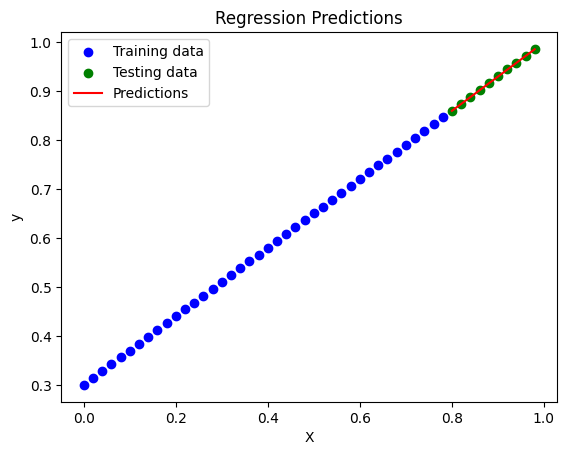

In [81]:
import torch
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  """
  Plots the predictions of a model against the actual data.

  Args:
      train_data: The training data.
      train_labels: The training labels.
      test_data: The test data.
      test_labels: The test labels.
      predictions: The predictions of the model.
  """

  # Plot training data as blue dots
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data as green dots
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot predictions as red line
  plt.plot(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend(loc="upper left")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Regression Predictions")
  plt.show()

model_2.eval()
with torch.inference_mode():

  y_preds = model_2(X_test_regression)
plot_predictions(train_data = X_train_regression,
                   train_labels = y_train_regression,
                   test_data = X_test_regression,
                   test_labels = y_test_regression,
                   predictions = y_preds)

WORKING WITH NON - LINEARITY

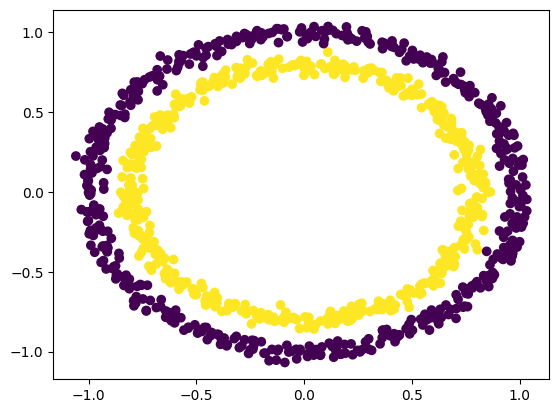

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y)


In [88]:
import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)



TypeError: expected np.ndarray (got Tensor)

In [89]:
import torch
from sklearn.model_selection import train_test_split
# Convert X and y to NumPy arrays before converting them to PyTorch tensors
X = X.numpy()
y = y.numpy()
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [91]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

BUILDING MODEL WITH NON LINEARITY

In [93]:
from torch import nn
class CirclemodelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CirclemodelV2()
model_3

CirclemodelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [99]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.01)


In [100]:
torch.manual_seed(42)

X_train, y_train = X_train, y_train
X_test, y_test = X_test, y_test

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.67298, Acc: 59.62% | Test Loss: 0.67071, Test Acc: 59.50%
Epoch: 100 | Loss: 0.67244, Acc: 59.75% | Test Loss: 0.67027, Test Acc: 59.50%
Epoch: 200 | Loss: 0.67189, Acc: 59.75% | Test Loss: 0.66981, Test Acc: 60.00%
Epoch: 300 | Loss: 0.67131, Acc: 60.00% | Test Loss: 0.66934, Test Acc: 60.00%
Epoch: 400 | Loss: 0.67071, Acc: 60.25% | Test Loss: 0.66884, Test Acc: 59.50%
Epoch: 500 | Loss: 0.67010, Acc: 60.50% | Test Loss: 0.66833, Test Acc: 59.00%
Epoch: 600 | Loss: 0.66947, Acc: 60.62% | Test Loss: 0.66780, Test Acc: 60.00%
Epoch: 700 | Loss: 0.66881, Acc: 60.88% | Test Loss: 0.66726, Test Acc: 60.00%
Epoch: 800 | Loss: 0.66812, Acc: 61.00% | Test Loss: 0.66669, Test Acc: 62.00%
Epoch: 900 | Loss: 0.66737, Acc: 60.88% | Test Loss: 0.66611, Test Acc: 62.00%


In [102]:
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds [:10], y_test[:10]

(tensor([[0.8596],
         [0.8736],
         [0.8875],
         [0.9015],
         [0.9155],
         [0.9295],
         [0.9435],
         [0.9574],
         [0.9714],
         [0.9854]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

NameError: name 'plot_decision_boundary' is not defined

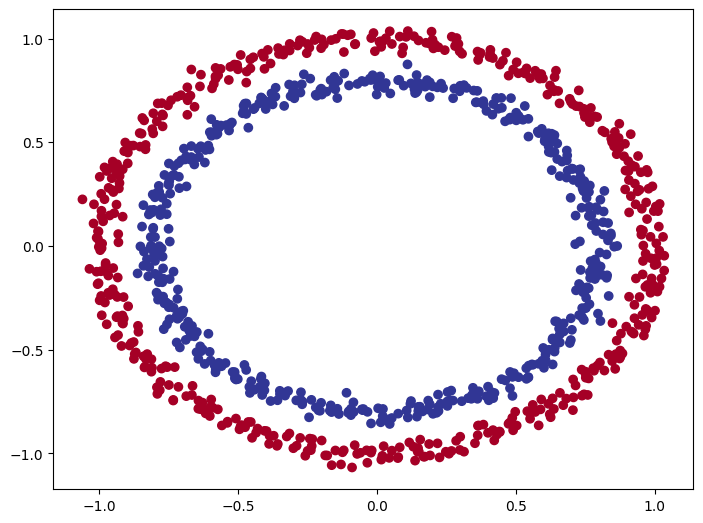

In [103]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
plot_decision_boundary(model_3, X, y)
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
olot_decision_boundary(model_3, X_test, y_test)


NameError: name 'plot_decision_boundary' is not defined

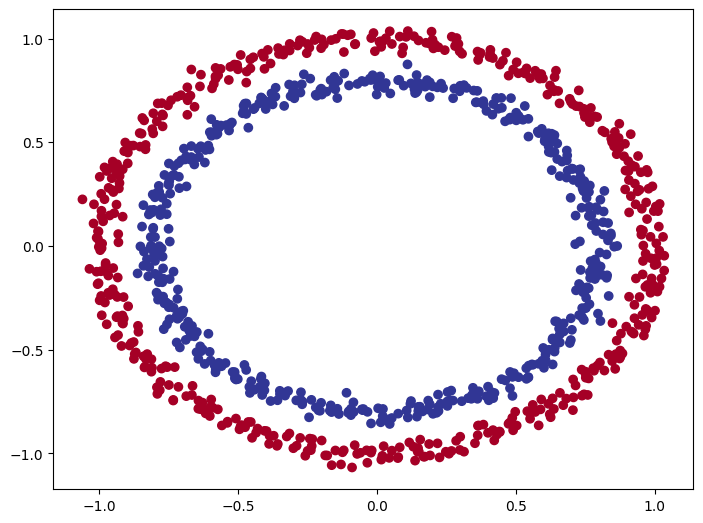

In [104]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
plot_decision_boundary(model_3, X, y)
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
plot_decision_boundary(model_3, X_test, y_test) # Fixed the typo here